In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\popov\Desktop\data_table\Opioid_data_2017_2020_NOSUPPRESSED.csv")
df.head()

,Unnamed: 0,Year,countycode,State,county,population,deaths,cruderate,DispenseRate,PersonalIncome,PerCapitaPersonalIncome,LessThanHS,HSDiplomaOnly,SomeCollege,BachelorOrHigher,PovertyPop,PovertyRate,UnemployedPop,UnemployedRate
0,1,2020,1003,AL,"Baldwin County, AL",229287,41,17.9,65.0,51348.0,233140.0,2063583.0,6282463.8,7153754.4,7451827.5,20189.0,8.9,6159.0,6.2
1,27,2020,1055,AL,"Etowah County, AL",102371,13,12.7,102.8,39795.0,103393.0,1412719.8,3460139.8,3521562.4,1842678.0,15650.0,15.6,3505.0,8.5
2,36,2020,1073,AL,"Jefferson County, AL",655342,227,34.6,139.0,58053.0,673341.0,5898078.0,17301028.8,19594725.8,22740367.4,92310.0,14.4,21947.0,6.9
3,44,2020,1089,AL,"Madison County, AL",379453,68,17.9,87.3,56499.0,389696.0,3035624.0,7285497.6,10814410.5,16809767.9,39100.0,10.5,9761.0,5.1
4,48,2020,1097,AL,"Mobile County, AL",412716,46,11.1,98.0,42837.0,414250.0,4993863.6,14114887.2,12257665.2,9863912.4,71398.0,17.6,16931.0,8.7


In [3]:
# Check if there are any suppressed values in the 'deaths' and 'cruderate' columns

num_suppressed_deaths = len(df[df['deaths'] == 'Suppressed'])
num_suppressed_crude = len(df[df['cruderate'] == 'Suppressed'])

print(f"Number of rows with Suppressed values in 'deaths' column: {num_suppressed_deaths}")
print(f"Number of rows with Suppressed values in 'cruderate' column: {num_suppressed_crude}")

Number of rows with Suppressed values in 'deaths' column: 0
Number of rows with Suppressed values in 'cruderate' column: 0


In [4]:
# Drop the columns that are not needed

df.drop(['Unnamed: 0', 'PovertyRate', 'UnemployedRate'], axis=1, inplace=True)

In [5]:
# Data frame 

df.head()

,Year,countycode,State,county,population,deaths,cruderate,DispenseRate,PersonalIncome,PerCapitaPersonalIncome,LessThanHS,HSDiplomaOnly,SomeCollege,BachelorOrHigher,PovertyPop,UnemployedPop
0,2020,1003,AL,"Baldwin County, AL",229287,41,17.9,65.0,51348.0,233140.0,2063583.0,6282463.8,7153754.4,7451827.5,20189.0,6159.0
1,2020,1055,AL,"Etowah County, AL",102371,13,12.7,102.8,39795.0,103393.0,1412719.8,3460139.8,3521562.4,1842678.0,15650.0,3505.0
2,2020,1073,AL,"Jefferson County, AL",655342,227,34.6,139.0,58053.0,673341.0,5898078.0,17301028.8,19594725.8,22740367.4,92310.0,21947.0
3,2020,1089,AL,"Madison County, AL",379453,68,17.9,87.3,56499.0,389696.0,3035624.0,7285497.6,10814410.5,16809767.9,39100.0,9761.0
4,2020,1097,AL,"Mobile County, AL",412716,46,11.1,98.0,42837.0,414250.0,4993863.6,14114887.2,12257665.2,9863912.4,71398.0,16931.0


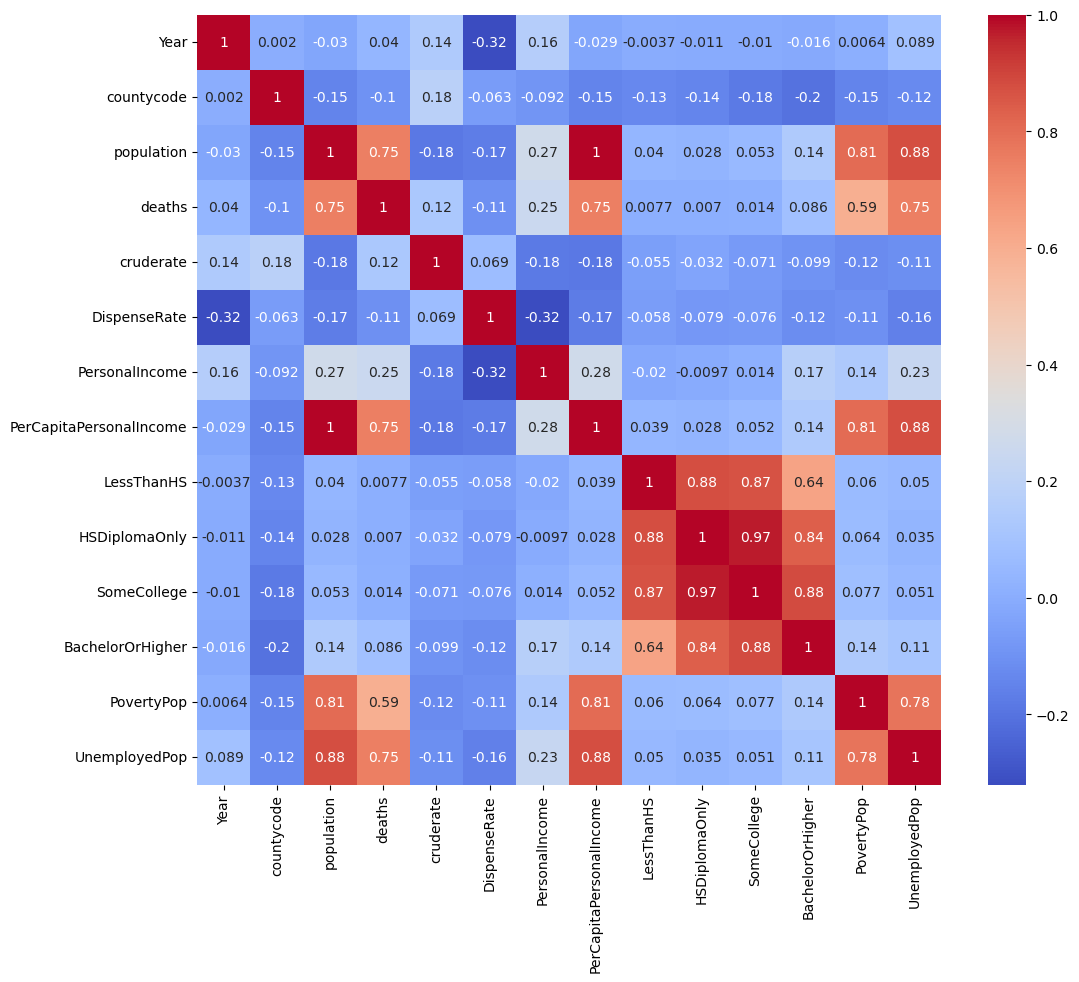

In [6]:
# Create a correlation matrix to identify the relationships between the variables

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [7]:
# Apply one-hot encoding to 'State' and 'county' columns

df_encoded = pd.get_dummies(df, columns=['State', 'county'])

In [8]:
# Split the dataset into input features (X) and target variable (y)

X = df_encoded.drop('cruderate', axis=1)
y = df_encoded['cruderate']

In [9]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Scale the features using StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Define the deep neural network using Keras API

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

In [12]:
# Compile the model with an appropriate loss function, optimizer, and evaluation metric

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [13]:
# Train the model with the training data using an appropriate batch size and number of epochs

history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    batch_size=64,
                    epochs=230,
                    verbose=0)

In [14]:
# Evaluate the model on the testing data

test_loss, test_rmse = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")

Test Loss: 83.576
Test RMSE: 9.142


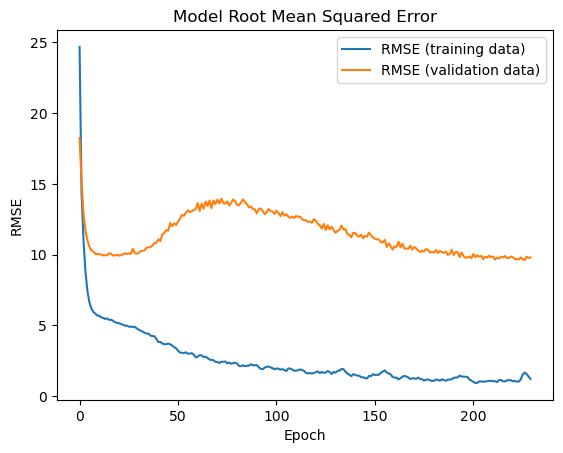

In [15]:
# Visualize the model's training history

plt.plot(history.history['root_mean_squared_error'], label='RMSE (training data)')
plt.plot(history.history['val_root_mean_squared_error'], label='RMSE (validation data)')
plt.title('Model Root Mean Squared Error')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [16]:
from sklearn.metrics import r2_score, mean_squared_error

# Use the trained model to predict on the testing data
y_pred_nn = model.predict(X_test_scaled)

# Calculate R-squared score, Mean Squared Error, and Root Mean Squared Error for the deep neural network
nn_r2 = r2_score(y_test, y_pred_nn)
nn_mse = mean_squared_error(y_test, y_pred_nn)
nn_rmse = np.sqrt(nn_mse)

print(f"Deep Neural Network R-squared score: {nn_r2:.3f}")
print(f"Deep Neural Network Mean Squared Error: {nn_mse:.3f}")
print(f"Deep Neural Network Root Mean Squared Error: {nn_rmse:.3f}")


20/20 [==============================] - 0s 3ms/step
Deep Neural Network R-squared score: 0.641
Deep Neural Network Mean Squared Error: 83.576
Deep Neural Network Root Mean Squared Error: 9.142
